# Importing Library

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [119]:
df=pd.read_csv('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [120]:
df.shape

(1372, 5)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [122]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [123]:
df.isnull().sum()
## No missing values

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

<AxesSubplot:>

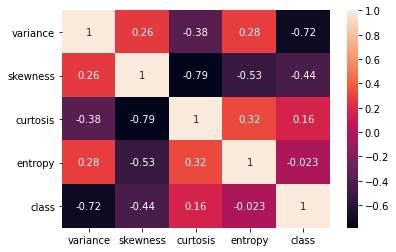

In [124]:
sns.heatmap(df.corr(),annot=True)

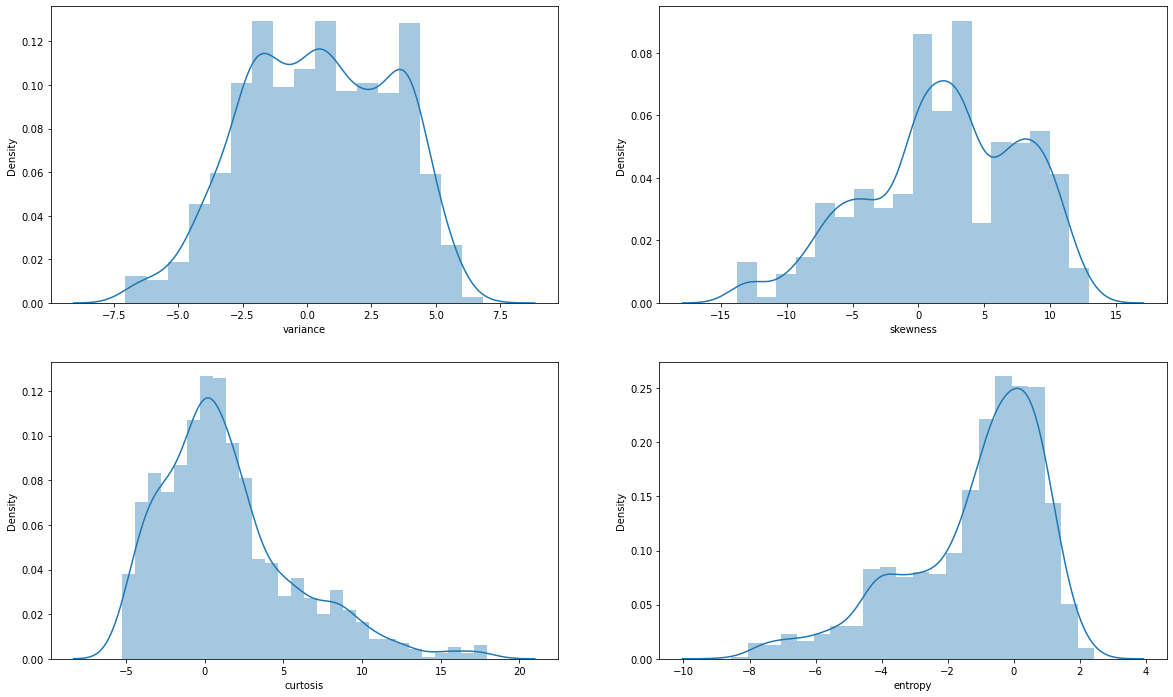

In [125]:
## checking distribution
plt.figure(figsize=(20,12))
plot=1
for i in df[:-1]:
    if plot<=4:
        plt.subplot(2,2,plot)
        sns.distplot(df[i])
    plot+=1
plt.show()    

In [126]:
df_n=df.drop('class',axis=1)
df_n.skew()

variance   -0.149388
skewness   -0.394103
curtosis    1.088569
entropy    -1.022243
dtype: float64

In [127]:
df['curtosis']=np.cbrt(df['curtosis'])
df['entropy']=np.cbrt(df['entropy'])

In [128]:
df.skew()

variance   -0.149388
skewness   -0.394103
curtosis   -0.146210
entropy     0.391627
class       0.223191
dtype: float64

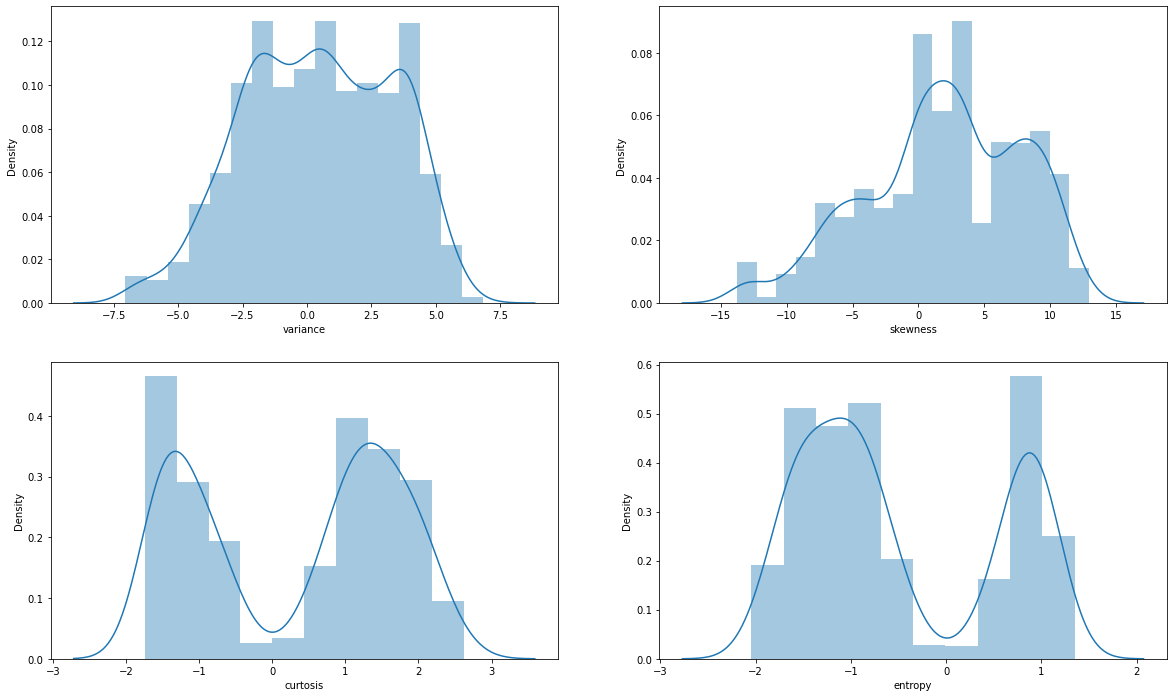

In [129]:
## Skewness gone
plt.figure(figsize=(20,12))
plot=1
for i in df[:-1]:
    if plot<=4:
        plt.subplot(2,2,plot)
        sns.distplot(df[i])
    plot+=1
plt.show()  

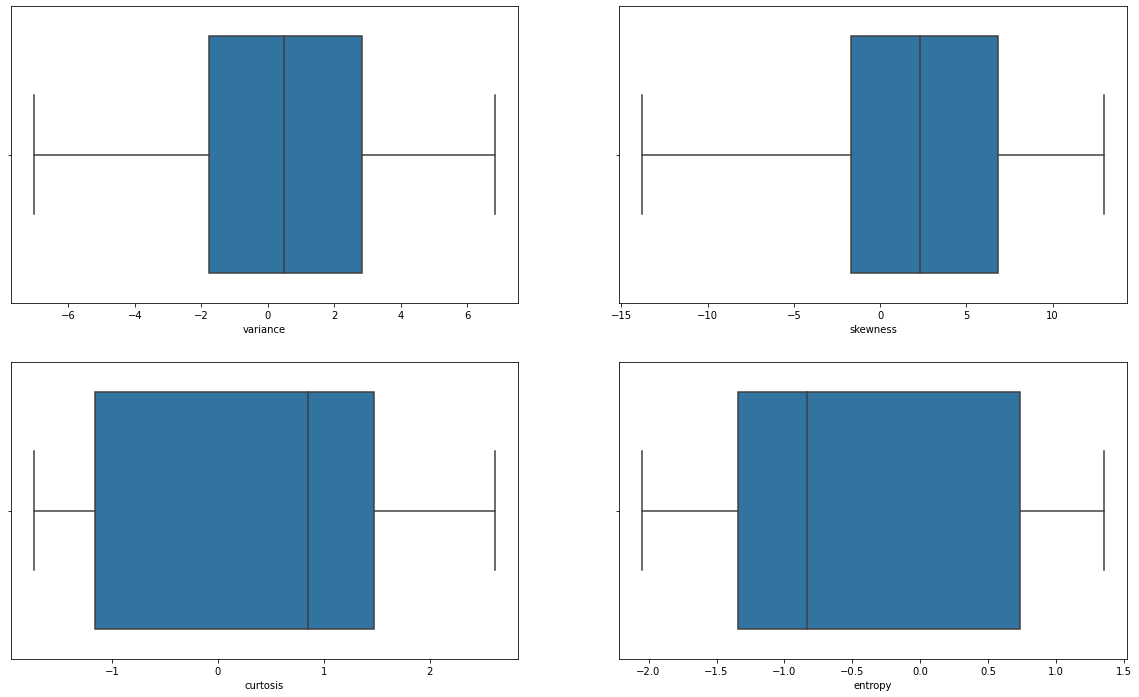

In [130]:
## checking Outliers
plt.figure(figsize=(20,12))
plot=1
for i in df[:-1]:
    if plot<=4:
        plt.subplot(2,2,plot)
        sns.boxplot(df[i])
    plot+=1
plt.show()

<AxesSubplot:title={'center':'Distribution of Class'}, xlabel='class', ylabel='count'>

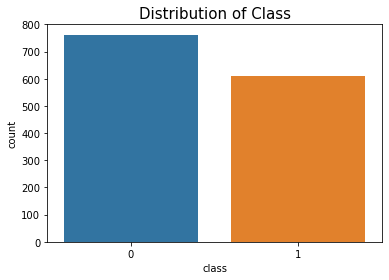

In [131]:
plt.title("Distribution of Class",fontsize=15)
sns.countplot(df['class'],data=df)

In [133]:
##Divide the data into input and output variable
x=df.drop('class',axis=1)
y=df['class']

In [134]:
## Scaling the data for Logistic Regression,KNN,SVM algos
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [135]:
##Model Building

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,accuracy_score
def maxf1_score(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=46,stratify=y)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print('F1_soore:',f1_score(y_test,y_pred))

    

In [167]:
## Cross validation
from sklearn.model_selection import cross_val_score
def cross_val(clf,x,y):
    print('Cross val score:',cross_val_score(clf,x,y,cv=9,scoring='f1'))
    print('Cross Validation mean score:',cross_val_score(clf,x,y,cv=9,scoring='f1').mean())
    print('Standard deviation of cross val score:',cross_val_score(clf,x,y,cv=9,scoring='f1').std())

In [168]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression()
maxf1_score(lg_clf,x_scaled,y)


F1_soore: 0.9918032786885246


In [169]:
cross_val(lg_clf,x_scaled,y)

Cross val score: [1.         0.99270073 0.97810219 0.99270073 0.97744361 0.9924812
 1.         0.99270073 0.98529412]
Cross Validation mean score: 0.9901581454710199
Standard deviation of cross val score: 0.007811524790514131


In [170]:
## decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
maxf1_score(dt_clf,x,y)

F1_soore: 0.991869918699187


In [171]:
cross_val(dt_clf,x,y)

Cross val score: [0.98529412 0.98550725 0.97014925 0.97777778 0.94814815 1.
 0.99270073 0.98507463 0.97810219]
Cross Validation mean score: 0.978622604905965
Standard deviation of cross val score: 0.014382586838592093


In [172]:
##Random forest
from sklearn.ensemble import RandomForestClassifier
rd_clf=RandomForestClassifier()
maxf1_score(rd_clf,x,y)

F1_soore: 0.9959183673469388


In [173]:
##Cross validation
cross_val(rd_clf,x,y)

Cross val score: [0.99270073 0.99270073 0.99270073 1.         0.96240602 1.
 0.99270073 1.         0.99270073]
Cross Validation mean score: 0.9917677405191812
Standard deviation of cross val score: 0.006563517920794976


Hence our random Forest is perform well

In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,test_size=.20,stratify=y)
rd_clf.fit(x_train,y_train)
y_pred=rd_clf.predict(x_test)

print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('Classification report:',classification_report(y_test,y_pred))
print('Roc_Auc score:',roc_auc_score(y_test,y_pred))

Confusion matrix: [[152   1]
 [  0 122]]
Classification report:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Roc_Auc score: 0.9967320261437909


# Saving our model

In [177]:
import pickle
file='banknote_rf.pkl'
pickle.dump(rd_clf,open(file,'wb'))